
📱 Welcome to Mutual Friend Recommender
Available users: Rahil, Jitesh, Harshit, Ashutosh, Siddhant


Enter your name:  Rahil



Friend suggestions for Rahil:
- Ashutosh (1 mutual friend)
- Siddhant (1 mutual friend)


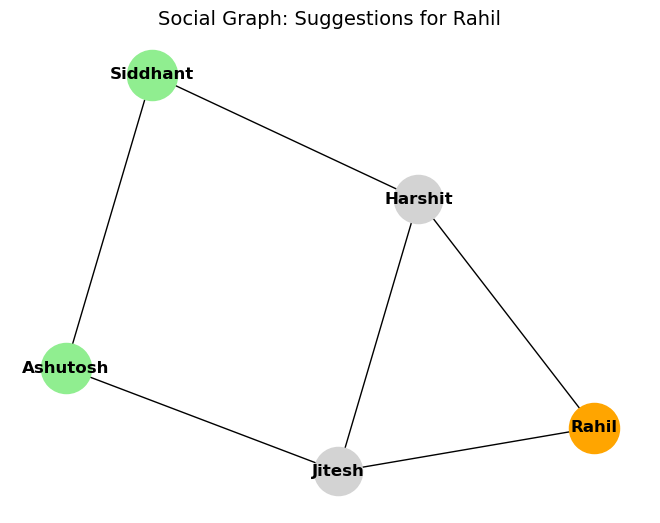

In [69]:
# Mutual Friend Recommender

from collections import deque, defaultdict  # Importing required modules
import networkx as nx  # For graph visualization
import matplotlib.pyplot as plt  # For plotting the graph

# Defining the social network graph
graph = {
    'Rahil': ['Jitesh', 'Harshit'],
    'Jitesh': ['Rahil', 'Harshit', 'Ashutosh'],
    'Harshit': ['Rahil', 'Jitesh', 'Siddhant'],
    'Ashutosh': ['Jitesh', 'Siddhant'],
    'Siddhant': ['Harshit', 'Ashutosh']
}

# Function to find mutual friend suggestions using BFS
def bfs_friend_suggestions(graph, start):
    direct_friends = set(graph[start])  # Direct friends of the user
    mutual_counts = defaultdict(int)  # To count mutual friend occurrences

    # Loop through each direct friend
    for friend in direct_friends:
        # Check friends of that friend
        for fof in graph[friend]:
            if fof != start and fof not in direct_friends:
                mutual_counts[fof] += 1  # Count mutual friend connection

    return mutual_counts

# Function to display friend suggestions in a user-friendly format
def display_suggestions(user, suggestions):
    print(f"\nFriend suggestions for {user}:")
    if not suggestions:
        print("No mutual friend suggestions found.")
    else:
        for name, count in suggestions.items():
            print(f"- {name} ({count} mutual friend{'s' if count > 1 else ''})")

# Function to visualize the social graph and highlight the user and suggestions
def visualize_graph(graph, user, suggestions):
    G = nx.Graph()

    for person, friends in graph.items():
        for friend in friends:
            G.add_edge(person, friend)

    pos = nx.spring_layout(G)  # Graph layout for better visualization

    nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=1200, font_weight='bold')
    nx.draw_networkx_nodes(G, pos, nodelist=[user], node_color='orange', node_size=1300)  # Highlight user
    nx.draw_networkx_nodes(G, pos, nodelist=suggestions, node_color='lightgreen', node_size=1300)  # Highlight suggestions

    plt.title(f"Social Graph: Suggestions for {user}", fontsize=14)
    plt.show()

# Main function to take user input and run the friend recommender system
def main():
    print("\n📱 Welcome to Mutual Friend Recommender")
    print("Available users:", ', '.join(graph.keys()))

    user = input("Enter your name: ").strip()

    if user not in graph:
        print("❌ User not found in the network.")
        return

    suggestions = bfs_friend_suggestions(graph, user)
    display_suggestions(user, suggestions)
    visualize_graph(graph, user, list(suggestions.keys()))

if __name__ == "__main__":
    main()
